<a href="https://colab.research.google.com/github/ranjanchoubey/ml2/blob/main/assignment-1/Q2-GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<pre>
Name : Ranjan Kumar Choubey
Class : M.Tech CS 2023-25
Roll No : CS2316
</pre>

![heading](https://raw.githubusercontent.com/ranjanchoubey/ml2/main/assignment-1/assets/heading.png)

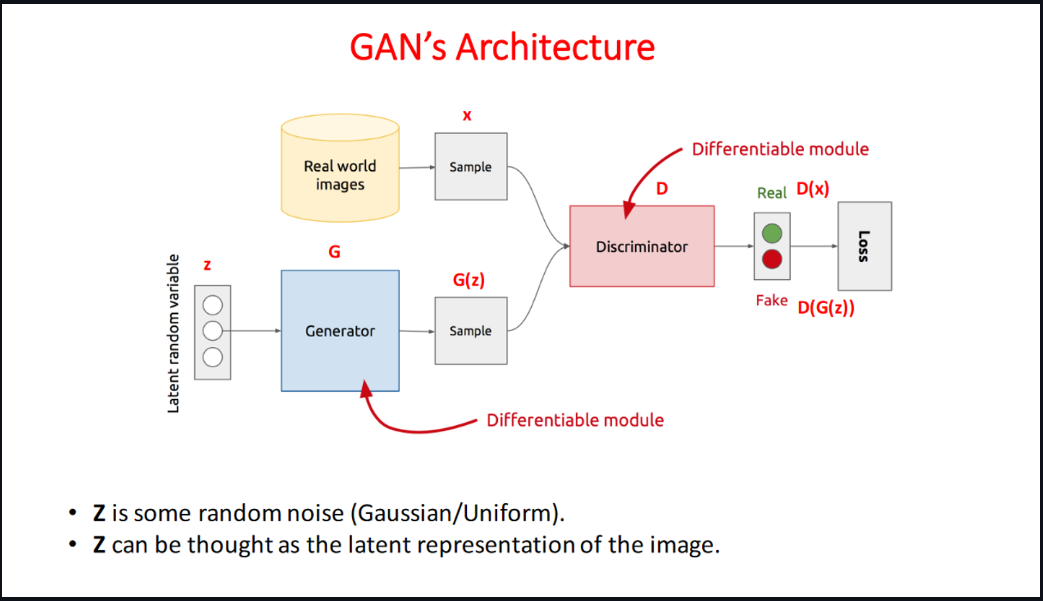

![q2.1.png](https://raw.githubusercontent.com/ranjanchoubey/ml2/main/assignment-1/assets/q2.1.png)

<br>
<hr>
<br>



![q2.2.png](https://raw.githubusercontent.com/ranjanchoubey/ml2/main/assignment-1/assets/q2.2.png)

<br>
<hr>
<br>

![q2.3.png](https://raw.githubusercontent.com/ranjanchoubey/ml2/main/assignment-1/assets/q2.3.png)
![gan.png](https://raw.githubusercontent.com/ranjanchoubey/ml2/main/assignment-1/assets/gan.png)
![gan-algo.png](https://raw.githubusercontent.com/ranjanchoubey/ml2/main/assignment-1/assets/gan-algo.png)
![gan-dataset.png](https://raw.githubusercontent.com/ranjanchoubey/ml2/main/assignment-1/assets/gan-dataset.png)

